<a href="https://colab.research.google.com/github/Anubhuti-SSrivastava/SENTIMENT-ANALYSIS/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SENTIMENT ANALYSIS THAT PARSES THE TWEETS FETCHED FROM TWEETS USING PYTHON

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#collapse_show
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
consumer_key="j53Lac7xCo1xyJ4LMgJ7xtm41"
consumer_secret="n64dBFF8kh7Zui1T0JWmTIVuuvGC3rK8GcyWyTcBElJzDsRY45"
access_token="1542157769083691011-KRrKTNtT9PGRKHoKiS765vmQ0bVewP"
access_secret="T3UrpBjMwgfewtJQ9qULDHzm45YVE5M87uZm0SPWUPRbb"

In [4]:
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token,access_secret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)


In [5]:
api=tweepy.API(authenticate)

In [6]:
!pip install -qq twint 
!pip install -qq whatthelang

     |████████████████████████████████| 263 kB 15.6 MB/s 
     |████████████████████████████████| 385 kB 73.6 MB/s 
     |████████████████████████████████| 288 kB 54.7 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 59 kB 4.1 MB/s 
     |████████████████████████████████| 140 kB 48.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 786 kB 12.2 MB/s 
     |████████████████████████████████| 871 kB 56.9 MB/s 
     |████████████████████████████████| 244 kB 57.6 MB/s 


In [7]:
import twint
c=twint.Config()
c.Store_object=True
c.Search="#workfromhome"
c.Limit=10
c.Lang
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import time
import warnings
warnings.filterwarnings('ignore')

In [9]:
text_query="workfromhome -filter:retweets"
count=50
try:
    #creation of query method using parameters
    tweets= tweepy.Cursor(api.search, q=text_query, tweet_mode="extended", lang='en').items(count)

    #getting the information from twitter object
    tweet_list= [[tweet.created_at, tweet.id, tweet.full_text] for tweet in tweets]
    #creating a data frame from the list
    tweet_df_from_query= pd.DataFrame(tweet_list, columns=['Date','tweet_id', 'tweet_text'])
        
except BaseException as e:
    print('failed_on_status', str(e))
    time.sleep(3)

In [10]:
tweet_df_from_query

,Date,tweet_id,tweet_text
0,2022-09-09 15:58:13,1568267542292209667,New Remote All Other Remote Job! ConvertKit: Senior Analytics Engineer \nApply here! https://t.co/clTWjeT2n0\n#remotework #remotejobs #workfromhome #wfh #remoteworking #futureofwork
1,2022-09-09 15:58:05,1568267507324289024,"How to Earn Money Online | Fulfilling, Productive Day in My Life #WorkFromHome #WorkFromAnywhere #Productivity #WorkingRemotely [Video] https://t.co/dBssaXFi6x"
2,2022-09-09 15:56:16,1568267052523343873,IT Support Engineer at Paramount Commerce\nParamount Commerce is a global payments technology company providing a safe and simple way to integrate bank acco...\n#WorkFromHome #workfromanywhere \nhttps://t.co/YdEcNZQ9E8
3,2022-09-09 15:55:39,1568266896734298113,We are looking for an Automation Software QA Engineer to work remotely from Latin America. English is a must. APPLY NOW! ➡️ https://t.co/U2L9p6F81w\n\n#wearehiring\n#remotework\n#workfromhome\n#QA\n#qatester https://t.co/qVWG398Dxv
4,2022-09-09 15:53:17,1568266298257285121,Are you on @AppleMusic? Share your best #workfromhome playlist with me please. I'm about to be here for a while. 🤣😂 https://t.co/FBTt6VBpqk
5,2022-09-09 15:53:15,1568266290036637700,New Remote Sales and Marketing Job! Start Your Recovery: Outreach Specialist For A Cause That Matters \nApply here! https://t.co/CRgneOSuqg\n#remotework #remotejobs #workfromhome #wfh #remoteworking #futureofwork
6,2022-09-09 15:52:38,1568266134675144705,Cable Technical Support at Sitel Group\nLocation Lvis North Job description FULLTIME WORK FROM HOME The Cable Customer Support Agent will handle inbound calls from ...\n#WorkFromHome #jobs \nhttps://t.co/RPtyOqltnL
7,2022-09-09 15:52:13,1568266032602845184,#Newjoinee\nJoin us in welcoming Gokul Shetty to the #SolveCube family!\n#WhySolveCube #meetourteam #gettoknowus #workfromhome #blendedworksforce #UAE #GCC #Singapore #India https://t.co/IFNZiThZKI
8,2022-09-09 15:50:11,1568265519563964416,"Let me ask you a question… Are you ready to create, launch, or scale your Tech VA business by the end of the year? Then join me in attending The Profitable Tech VA Summit from September 19th - 23rd\nhttps://t.co/LifR1IdFai #ad #virtualassistant #workfromhome"
9,2022-09-09 15:50:05,1568265494041624576,"Inventory jobs available on Careerbarn. Apply to Warehouse Worker, Inventory Associate, Material Handler and more! #jobopenings jobs hiring #workfromhome #employers https://t.co/U8XGMwWgfG"


In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

In [12]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk

import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install langdetect
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
!pip install pycountry
import pycountry
import nltk
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 15.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=11fb869eaac551c0a87c0006f1edb83bf4c86f054f375d22de568b50b0a04e77
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 15.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=ffa09a8df3791b2533b347c5af7e6a25ce92632432ae910cf97f4a0c8162a75b
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d46

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('enter')
noOfTweet = int(input ('“Please enter how many tweets to analyze:'))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
api = tweepy.API(authenticate, wait_on_rate_limit=True)
for tweet in tweets:
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']


  
  polarity += analysis.sentiment.polarity
  if neg > pos:
   negative_list.append(tweet.text)
   negative += 1

 
  elif (pos > neg):
   positive_list.append(tweet.text)
   positive += 1

   


  
 
  elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1


 

 
 
 
 
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive,'.1f')
negative = format(negative, '.1f')
neutral = format(neutral,'.1f')

enter#workfromhome
“Please enter how many tweets to analyze:60


In [14]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('“total number:',len(tweet_list))
print('positive number: ',len(positive_list))
print('“negative number: “', len(negative_list))
print('“neutral number: “',len(neutral_list))

“total number: 60
positive number:  21
“negative number: “ 1
“neutral number: “ 38


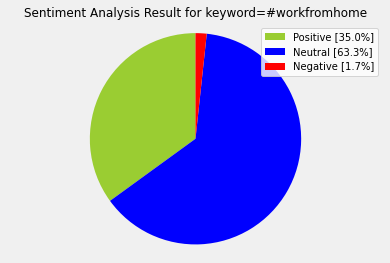

In [15]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword='+keyword+'' )
plt.axis('equal')
plt.show()

In [16]:
tweet_list

,0
0,Start watching your favorite movies today!🎬\n\nBuy or sell top-class movies at Mamati market.\n\nGet started today:… https://t.co/xSCw4lJbXc
1,Magento eCommerce Senior Software Engineer\n @ \nTrellis eCommerce Agency \n\nhttps://t.co/RFKT33y74c\n\n#Backend… https://t.co/1glnzr3F28
2,React eCommerce Senior Software Engineer\n @ \nTrellis eCommerce Agency \n\nhttps://t.co/eNGsDxrvch\n\n#Developer… https://t.co/A8hmXlpq2l
3,Software Engineer Backend\n @ \nAffirm \n\nhttps://t.co/fyRwBQUmSr\n\n#Software #Financial #Python #workfromhome #remotework #remote
4,Software Engineer Backend\n @ \nAffirm \n\nhttps://t.co/OZrHzNFqT6\n\n#Manager #Lead #Sales #workfromhome #remotework #remote
5,"💰 KETO BUSINESS &gt; Pruvit Promoter Business Benefits - Testimonials, How to Start etc. https://t.co/d5fukPS7XI… https://t.co/RnlWAYXNFy"
6,Senior Software Engineer Backend\n @ \nAffirm \n\nhttps://t.co/GPBH11HN04\n\n#Manager #Lead #Sales #workfromhome #remotework #remote
7,Here are 4 SIDE JOBS Ideas to make $100/DAY. Anyone can try any of these. also click on the link below to download… https://t.co/faaCpU8qiZ
8,New Remote All Other Remote Job! ConvertKit: Senior Analytics Engineer \nApply here! https://t.co/clTWjeT2n0… https://t.co/5ItUfPpN2Z
9,"RT @SportingVerse: ⚡The best way to succeed at something new is by sticking to it for at least 1 year, not just 1 day or 1 week. Let's star…"


In [17]:
tweet_list.drop_duplicates(inplace = True)

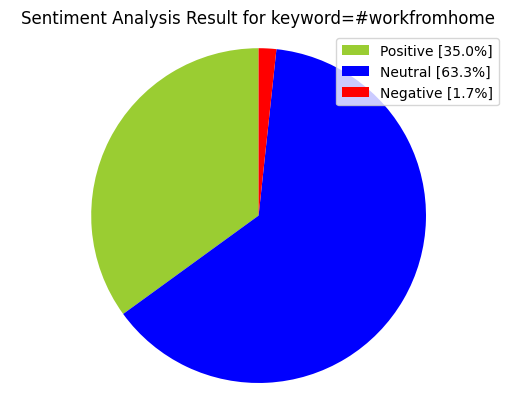

In [23]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword='+keyword+'' )
plt.axis('equal')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
documents = ["This is Import Data's Youtube channel",
"Data science is my passion and it is fun!",
"Please subscribe to my channel"]
# initializing the countvectorizer
vectorizer = CountVectorizer()
# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)
# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
